In [1]:
##############################################
# Programmer Name:  
# Class:
# Programming Assignment 
# Date:
#
#
# Description: 
##############################################

Use the below [auto-mpg][mpg] data to answer the below questions:


> 


----
[mpg]:https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'

In [3]:
import pandas as pd
mpg = pd.read_csv(url)

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### **Setup your notebook but importing the required packages and settings in the below cell**
- Enable inline graph, set seaborn style to white, ignore warning and import required packages

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")


### **Load the data into pandas data frame `auto` and display the first 5 rows**

In [6]:
auto = sns.load_dataset('mpg')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## **Exploratory Data Analysis (EDA) Section**


### **Check for missing values and remove rows with missing values**

In [7]:
auto.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:

auto = auto.dropna()



In [9]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### **Calculate the 5 number summary for the `mpg` column**

In [10]:
print(auto.mpg)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64


In [11]:
from numpy import percentile
quartiles = percentile(auto.mpg, [25,50,75])
# print 5-number summary
print('Min: %.3f' % auto.mpg.min())
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % auto.mpg.max())


Min: 9.000
Q1: 17.000
Median: 22.750
Q3: 29.000
Max: 46.600


### **Create a histogram for `mpg` column with rugplot as shwon below**

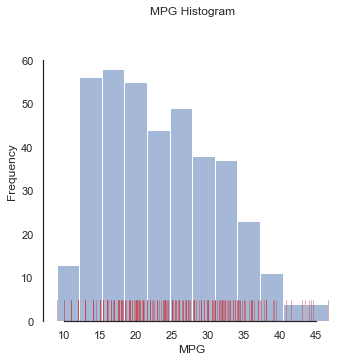

In [12]:
sns.displot(auto['mpg'], rug=True, rug_kws={'color': 'r', 'alpha':0.5, 'height': 0.07}, alpha=0.5)
plt.title('MPG Histogram')
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Frequency')

#clean up final results
sns.despine(trim=True)

### Create a box plot for mpg vs Cylinders as shown below

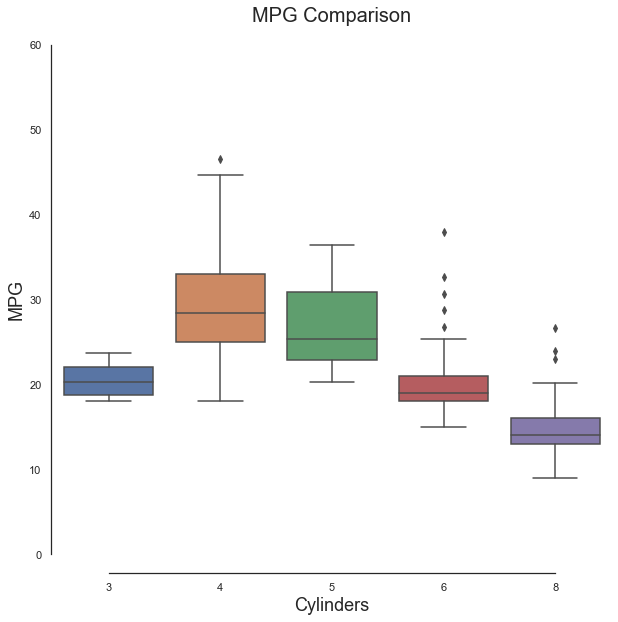

In [13]:
# Compare several distributions by using boxplots
fig, axs = plt.subplots(figsize=(10, 10))

# df = auto["cylinders"]
# dy = auto["mpg"]
# print(df)
# Boxplot
sns.boxplot(ax=axs, x='cylinders', y='mpg', data=auto)

# # Define x-axis limits and label
axs.set_ylim(-2, 62)
axs.set_xlabel('Cylinders', fontsize=18)
axs.set_ylabel('MPG', fontsize=18)

# # Title each plot
axs.set_title('MPG Comparison', ha='center', fontsize=20)

# Clean up each plot
sns.despine(ax=axs, offset=2, trim=True)

## **Predictive Modeling Section**

### **Build a linear regression model to predict the dependant variable `mpg`.** 
- Use the rest of the columns as indpendant variables.
- In the below cell create two variables `dep_data` and `ind_data`
- Display the shapes of the two variables

In [14]:
#convert strings into numbers
auto.head()
auto = pd.get_dummies(auto, columns=['origin'])
auto.head()
#Not sure how to do name, but I don't want to have a crazy long equation for the name

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,0,1


In [15]:
# auto['origin'] = auto['origin'].astype(int)
# auto['name'] = auto['name'].astype(int)
ind_data = auto[{'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model_year', 'origin_europe','origin_japan', 'origin_usa'}].values
dep_data = auto['mpg']
print("indepedent shape =", ind_data.shape)
print("dependent shape = ", dep_data.shape)

indepedent shape = (392, 9)
dependent shape =  (392,)


### **Split the data into training and testing use 0.3 for test size.**

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
ind_data_train, ind_data_test, dep_data_train, dep_data_test = train_test_split(ind_data, dep_data, test_size=0.3, random_state=42)

### **Fit a Multi Linear Regression (MLR) model using the train data and compute the (Coefficient of Determination)**


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(ind_data_train, dep_data_train)

LinearRegression()

In [20]:
model.intercept_

-15.499852842200248

In [21]:
print(f'mpg = {model.intercept_:5.2f} + {model.coef_[0]:5.2f}*cylinders + {model.coef_[1]:5.2f}*displacement + {model.coef_[2]:5.2f}*horsepower + {model.coef_[3]:5.2f}*weight + {model.coef_[4]:5.2f}*acceleration + {model.coef_[5]:5.2f}*model_year + {model.coef_[6]:5.2f}*origin_europe + {model.coef_[7]:5.2f}*origin_japan + {model.coef_[8]:5.2f}*origin_usa')

mpg = -15.50 +  1.13*cylinders +  0.78*displacement + -0.33*horsepower +  0.04*weight + -0.01*acceleration + -2.23*model_year + -0.03*origin_europe +  0.02*origin_japan +  1.10*origin_usa


In [22]:
dep_data_pred = model.predict(ind_data_test)

In [23]:
model.score(ind_data_train, dep_data_train)

0.8264725052859166

In [24]:
dep_data_pred

array([27.18313465, 27.1137765 , 34.42749367, 24.51965856, 28.1397483 ,
       30.31792039,  8.62951145, 30.47504439, 20.52420346, 30.06210953,
       12.59139672, 24.97140612, 16.82484156, 29.42205819, 22.90419684,
       28.84473973, 20.23904278, 33.21744527, 26.3233558 , 31.30754596,
       18.78553805, 36.12013685, 35.34586703, 14.953345  , 29.77516512,
       26.81434277, 22.22342237, 15.99675866, 30.27826644, 25.45699696,
       13.45684638, 23.53661524, 20.76892542, 31.75165735, 12.54405065,
       36.09787267, 10.67248113, 23.9174239 , 11.29079807,  6.65002263,
       12.83716005, 28.85312918, 36.21492323, 27.65478144, 11.99848941,
        9.73691626, 17.62336429, 32.76504392, 24.15900237, 31.58071812,
       11.92173725, 26.14195764, 22.78567079, 34.97302622, 28.28391249,
       17.74497792, 20.35115337, 22.73603938, 23.84570627, 25.61791238,
        8.39023181, 22.78697021, 25.43646287, 24.56508375, 29.71308886,
       30.11798192, 25.40369633, 30.79426393, 21.81711467, 10.11

In [25]:
dep_data_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
80     22.0
312    37.2
357    32.9
250    19.4
155    15.0
Name: mpg, Length: 118, dtype: float64

In [26]:
#create dataframe for the stuls of predicted (y_pred), actual(y_test) and the residual error(y_test-y_pred)
result_df=pd.DataFrame({'Predicted': dep_data_pred, 'Actual': dep_data_test, 'Residual': dep_data_test - dep_data_pred})
result_df.head()

,Predicted,Actual,Residual
79,27.183135,26.0,-1.183135
276,27.113777,21.6,-5.513777
248,34.427494,36.1,1.672506
56,24.519659,26.0,1.480341
393,28.139748,27.0,-1.139748


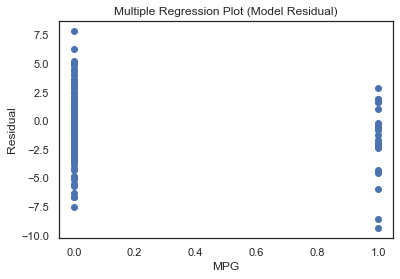

In [27]:
plt.scatter(ind_data_test[:,0], dep_data_test-dep_data_pred, label='Testing Data')
plt.xlabel("MPG")
plt.ylabel("Residual")
plt.title("Multiple Regression Plot (Model Residual)");

### **Calculate MSE and RMSE for the MLR model**
- First cacluate the results using model.predict and use metrics package for calculation
- In a separate text cell interpert the RMSE value

In [28]:
from sklearn import metrics

In [29]:
print('MSE:', metrics.mean_squared_error(dep_data_test,dep_data_pred))

MSE: 10.344169215429364


In [30]:
print('RSME:', np.sqrt(metrics.mean_squared_error(dep_data_test,dep_data_pred)))

RSME: 3.2162352549882547


### **Build a decision tree model and fine tune `max_depth` hyperparameter to provide optimum values for (R2, MSE, RMSE).**
- In a separate text cell discuss the process and the results compared to MLR model.

In [52]:
from sklearn.tree import DecisionTreeRegressor
#Fit regression model
min =DecisionTreeRegressor(max_depth=1).fit(ind_data_train, dep_data_train).score(ind_data_train, dep_data_train)
epsilon = .000001
temp = 0
iter = 50
r = np.zeros(iter)
for i in range(iter):
    reg = DecisionTreeRegressor(max_depth=i+1).fit(ind_data_train, dep_data_train)
    r[i] = reg.score(ind_data_train, dep_data_train)
  
    if(epsilon<abs(r[i]-min)):
        min =r[i]
        temp =i
    #print(min)
print(min)
print(temp)


1.0
15


In [45]:
r

array([0.60637062, 0.75953461, 0.84071889, 0.89809886, 0.93791138,
       0.96028094, 0.97722682, 0.98729379, 0.99499198, 0.99874643,
       0.99962212, 0.99989242, 0.99992362, 0.99996124, 0.99999848,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])